In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the UN-M49 CSV file and load it into a DataFrame
M49 = pd.read_csv('/content/UN-M49.csv')
# Explore data structure
M49.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Global Code                              248 non-null    int64  
 1   Global Name                              248 non-null    object 
 2   Region Code                              247 non-null    float64
 3   Region Name                              247 non-null    object 
 4   Sub-region Code                          247 non-null    float64
 5   Sub-region Name                          247 non-null    object 
 6   Intermediate Region Code                 105 non-null    float64
 7   Intermediate Region Name                 105 non-null    object 
 8   Country or Area                          248 non-null    object 
 9   M49 Code                                 248 non-null    int64  
 10  ISO-alpha2 Code                          247 non-n

In [ ]:
# 1. Global Name counts
print(M49['Global Name'].value_counts())

Global Name
World    248
Name: count, dtype: int64


In [ ]:
# 2. Number of Countries by Region
print(M49['Region Name'].value_counts())

Region Name
Africa      60
Americas    57
Europe      51
Asia        50
Oceania     29
Name: count, dtype: int64


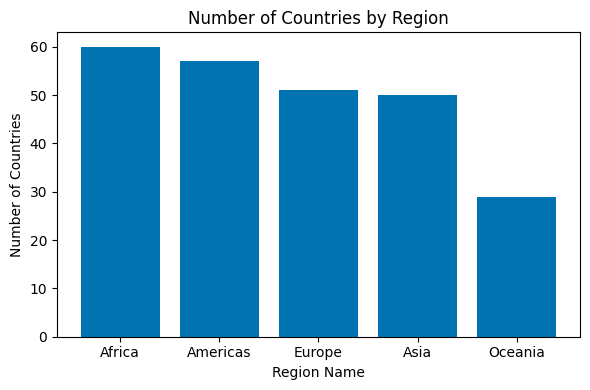

In [ ]:
# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(M49['Region Name'].value_counts().index, M49['Region Name'].value_counts().values)
plt.title('Number of Countries by Region')
plt.ylabel('Number of Countries')
plt.xlabel('Region Name')
plt.tight_layout()
plt.show()

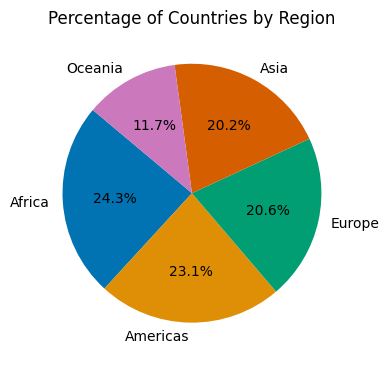

In [ ]:
# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    M49['Region Name'].value_counts().values,
    labels=M49['Region Name'].value_counts().index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10}
)
plt.title('Percentage of Countries by Region')
plt.tight_layout()
plt.show()

In [ ]:
# 3. Number of Countries by Sub-region
subregion_counts = M49.groupby(['Region Name', 'Sub-region Name'])['Country or Area'].count().reset_index()
subregion_counts.columns = ['Region Name', 'Sub-region Name', 'Country Count']
subregion_counts = subregion_counts.sort_values(
    by=['Region Name', 'Country Count'],
    ascending=[True, False]
).reset_index(drop=True)
print(subregion_counts)

   Region Name                  Sub-region Name  Country Count
0       Africa               Sub-Saharan Africa             53
1       Africa                  Northern Africa              7
2     Americas  Latin America and the Caribbean             52
3     Americas                 Northern America              5
4         Asia                     Western Asia             18
5         Asia               South-eastern Asia             11
6         Asia                    Southern Asia              9
7         Asia                     Eastern Asia              7
8         Asia                     Central Asia              5
9       Europe                  Northern Europe             16
10      Europe                  Southern Europe             16
11      Europe                   Eastern Europe             10
12      Europe                   Western Europe              9
13     Oceania                        Polynesia             10
14     Oceania                       Micronesia        

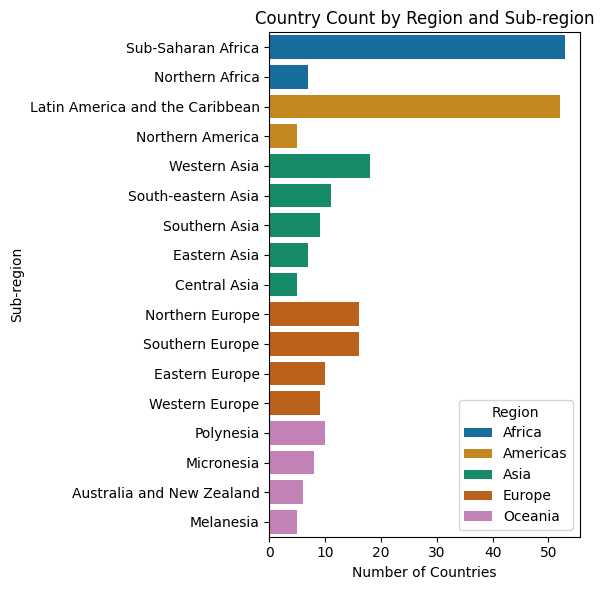

In [ ]:
# Plot
sns.set_palette("colorblind")
plt.figure(figsize=(6, 6))
sns.barplot(
    data=subregion_counts,
    x='Country Count',
    y='Sub-region Name',
    hue='Region Name',
    dodge=False
)
plt.title('Country Count by Region and Sub-region')
plt.xlabel('Number of Countries')
plt.ylabel('Sub-region')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [ ]:
# 4. Intermediate Region Name counts
# Step 1: Count number of countries per Intermediate Region
intermediate_region_counts = M49['Intermediate Region Name'].value_counts().reset_index()
intermediate_region_counts.columns = ['Intermediate Region Name', 'Country Count']
# Step 2: Get unique mapping of Intermediate Region to Sub-region
intermediate_to_subregion = M49[['Intermediate Region Name', 'Sub-region Name']].dropna().drop_duplicates()
# Step 3: Merge to add Sub-region Name to the count table
intermediate_region_counts = intermediate_region_counts.merge(
    intermediate_to_subregion,
    on='Intermediate Region Name',
    how='left'
)
# Step 4: Reorder columns
intermediate_region_counts = intermediate_region_counts[['Sub-region Name', 'Intermediate Region Name', 'Country Count']]
# Step 5: Sort by Sub-region alphabetically, and then by Country Count descending
intermediate_region_counts = (
    intermediate_region_counts
    .sort_values(by=['Sub-region Name', 'Country Count'], ascending=[True, False])
    .reset_index(drop=True)
)
print(intermediate_region_counts)

                   Sub-region Name Intermediate Region Name  Country Count
0  Latin America and the Caribbean                Caribbean             28
1  Latin America and the Caribbean            South America             16
2  Latin America and the Caribbean          Central America              8
3               Sub-Saharan Africa           Eastern Africa             22
4               Sub-Saharan Africa           Western Africa             17
5               Sub-Saharan Africa            Middle Africa              9
6               Sub-Saharan Africa          Southern Africa              5


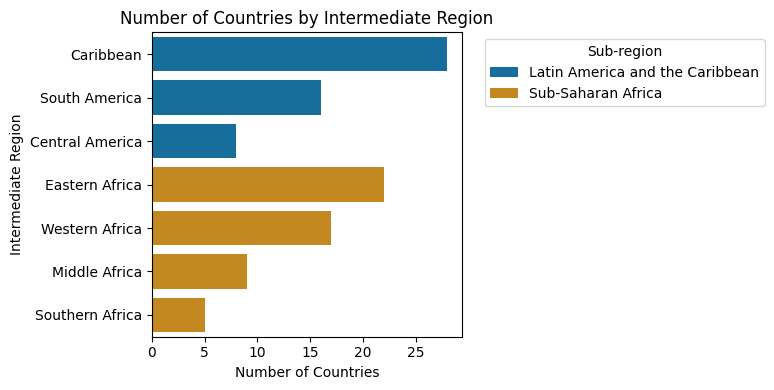

In [ ]:
# Plot
plt.figure(figsize=(8, 4))
sns.barplot(
    data=intermediate_region_counts,
    x='Country Count',
    y='Intermediate Region Name',
    hue='Sub-region Name',
    dodge=False
)
plt.title('Number of Countries by Intermediate Region')
plt.xlabel('Number of Countries')
plt.ylabel('Intermediate Region')
plt.legend(title='Sub-region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Create new sub-region column using intermediate where available
M49_extended = M49.copy()
M49_extended['Sub-region Name'] = M49_extended['Intermediate Region Name'].fillna(M49_extended['Sub-region Name'])
M49_extended['Sub-region Code'] = M49_extended['Intermediate Region Code'].fillna(M49_extended['Sub-region Code'])
M49_extended = M49_extended.drop(columns=['Intermediate Region Name'])
M49_extended = M49_extended.drop(columns=['Intermediate Region Code'])
M49_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Global Code                              248 non-null    int64  
 1   Global Name                              248 non-null    object 
 2   Region Code                              247 non-null    float64
 3   Region Name                              247 non-null    object 
 4   Sub-region Code                          247 non-null    float64
 5   Sub-region Name                          247 non-null    object 
 6   Country or Area                          248 non-null    object 
 7   M49 Code                                 248 non-null    int64  
 8   ISO-alpha2 Code                          247 non-null    object 
 9   ISO-alpha3 Code                          248 non-null    object 
 10  Least Developed Countries (LDC)          44 non-nu

In [ ]:
# Group by Region and updated Sub-region
subregion_counts_extended = (
    M49_extended.groupby(['Region Name', 'Sub-region Name'])['Country or Area']
    .count()
    .reset_index(name='Country Count')
    .sort_values(by=['Region Name', 'Country Count'], ascending=[True, False])
    .reset_index(drop=True)
)
print(subregion_counts_extended)

   Region Name            Sub-region Name  Country Count
0       Africa             Eastern Africa             22
1       Africa             Western Africa             17
2       Africa              Middle Africa              9
3       Africa            Northern Africa              7
4       Africa            Southern Africa              5
5     Americas                  Caribbean             28
6     Americas              South America             16
7     Americas            Central America              8
8     Americas           Northern America              5
9         Asia               Western Asia             18
10        Asia         South-eastern Asia             11
11        Asia              Southern Asia              9
12        Asia               Eastern Asia              7
13        Asia               Central Asia              5
14      Europe            Northern Europe             16
15      Europe            Southern Europe             16
16      Europe             East

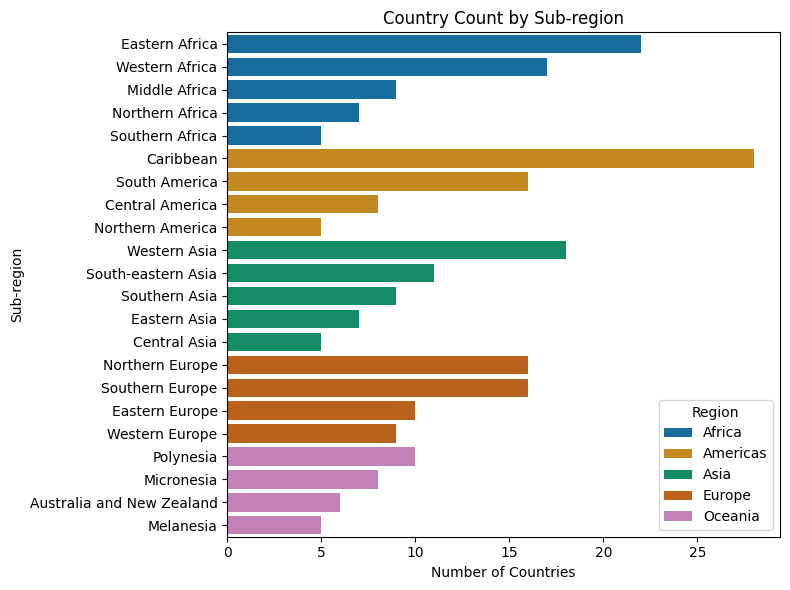

In [ ]:
# Plot
sns.set_palette("colorblind")
plt.figure(figsize=(8, 6))
sns.barplot(
    data=subregion_counts_extended,
    x='Country Count',
    y='Sub-region Name',
    hue='Region Name',
    dodge=False
)
plt.title('Country Count by Sub-region')
plt.xlabel('Number of Countries')
plt.ylabel('Sub-region')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

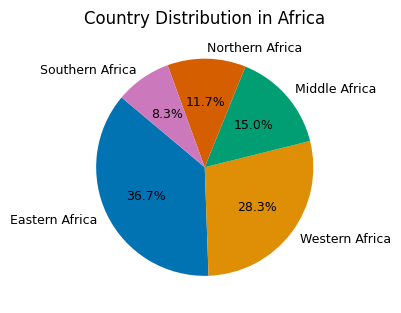

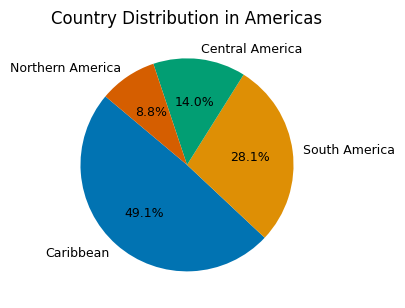

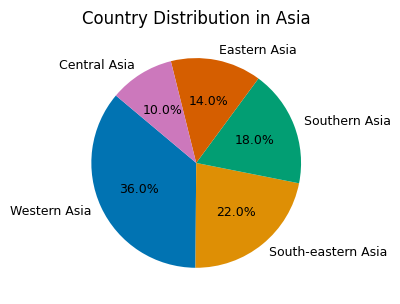

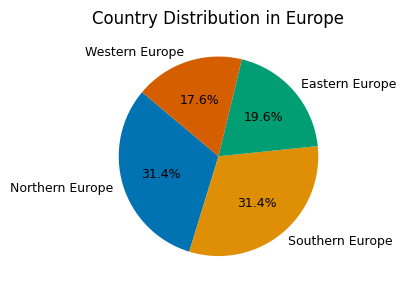

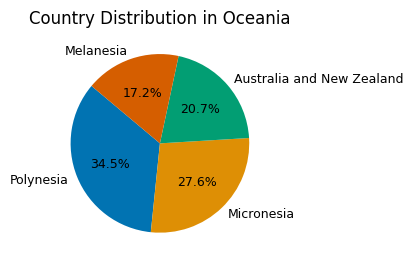

In [ ]:
# Group data by Region
grouped = subregion_counts_extended.groupby('Region Name')

# Create a pie chart for each region
for region, data in grouped:
    plt.figure(figsize=(4, 4))
    plt.pie(
        data['Country Count'],
        labels=data['Sub-region Name'],
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 9}
    )
    plt.title(f'Country Distribution in {region}')
    plt.tight_layout()
    plt.show()

In [ ]:
# 6. Least Developed Countries (LDCs)
ldcs = M49_extended[M49_extended['Least Developed Countries (LDC)'] == 'x']
print(ldcs.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 4 to 246
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Global Code                              44 non-null     int64  
 1   Global Name                              44 non-null     object 
 2   Region Code                              44 non-null     float64
 3   Region Name                              44 non-null     object 
 4   Sub-region Code                          44 non-null     float64
 5   Sub-region Name                          44 non-null     object 
 6   Country or Area                          44 non-null     object 
 7   M49 Code                                 44 non-null     int64  
 8   ISO-alpha2 Code                          44 non-null     object 
 9   ISO-alpha3 Code                          44 non-null     object 
 10  Least Developed Countries (LDC)          44 non-null    

In [ ]:
# Count of LDCs by Region and New Sub-region
ldc_counts = (
    ldcs.groupby(['Region Name', 'Sub-region Name'])['Country or Area']
    .count()
    .reset_index(name='Country Count')
    .sort_values(by=['Region Name', 'Country Count'], ascending=[True, False])
    .reset_index(drop=True)
)
print(ldc_counts)

   Region Name     Sub-region Name  Country Count
0       Africa      Eastern Africa             14
1       Africa      Western Africa             12
2       Africa       Middle Africa              4
3       Africa     Northern Africa              1
4       Africa     Southern Africa              1
5     Americas           Caribbean              1
6         Asia  South-eastern Asia              4
7         Asia       Southern Asia              3
8         Asia        Western Asia              1
9      Oceania           Melanesia              1
10     Oceania          Micronesia              1
11     Oceania           Polynesia              1


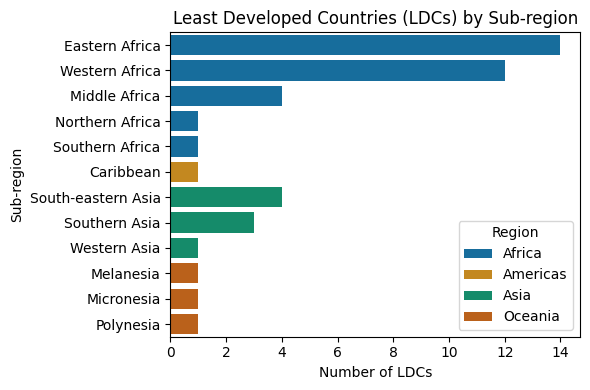

In [ ]:
# Plot
sns.set_palette("colorblind")
plt.figure(figsize=(6, 4))
sns.barplot(
    data=ldc_counts,
    x='Country Count',
    y='Sub-region Name',
    hue='Region Name',
    dodge=False
)
plt.title('Least Developed Countries (LDCs) by Sub-region')
plt.xlabel('Number of LDCs')
plt.ylabel('Sub-region')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

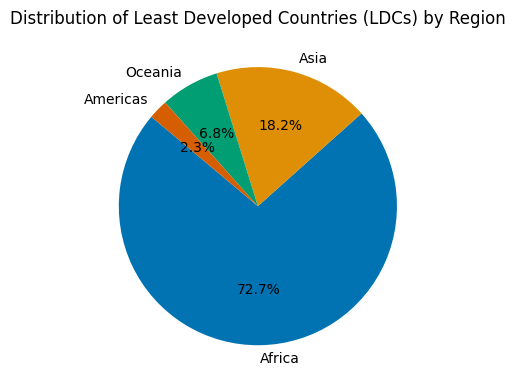

In [ ]:
# Plot pie chart
ldc_by_region = ldcs['Region Name'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    ldc_by_region.values,
    labels=ldc_by_region.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10}
)
plt.title('Distribution of Least Developed Countries (LDCs) by Region')
plt.tight_layout()
plt.show()

In [ ]:
# 7. Land Locked Developing Countries (LLDCs)
lldcs = M49_extended[M49_extended['Land Locked Developing Countries (LLDC)'] == 'x']
print(ldcs.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 4 to 246
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Global Code                              44 non-null     int64  
 1   Global Name                              44 non-null     object 
 2   Region Code                              44 non-null     float64
 3   Region Name                              44 non-null     object 
 4   Sub-region Code                          44 non-null     float64
 5   Sub-region Name                          44 non-null     object 
 6   Country or Area                          44 non-null     object 
 7   M49 Code                                 44 non-null     int64  
 8   ISO-alpha2 Code                          44 non-null     object 
 9   ISO-alpha3 Code                          44 non-null     object 
 10  Least Developed Countries (LDC)          44 non-null    

In [ ]:
# Count of LLDCs by Region and New Sub-region
lldc_counts = (
    lldcs.groupby(['Region Name', 'Sub-region Name'])['Country or Area']
    .count()
    .reset_index(name='Country Count')
    .sort_values(by=['Region Name', 'Country Count'], ascending=[True, False])
    .reset_index(drop=True)
)
print(lldc_counts)

   Region Name     Sub-region Name  Country Count
0       Africa      Eastern Africa              8
1       Africa     Southern Africa              3
2       Africa      Western Africa              3
3       Africa       Middle Africa              2
4     Americas       South America              2
5         Asia        Central Asia              5
6         Asia       Southern Asia              3
7         Asia        Western Asia              2
8         Asia        Eastern Asia              1
9         Asia  South-eastern Asia              1
10      Europe      Eastern Europe              1
11      Europe     Southern Europe              1


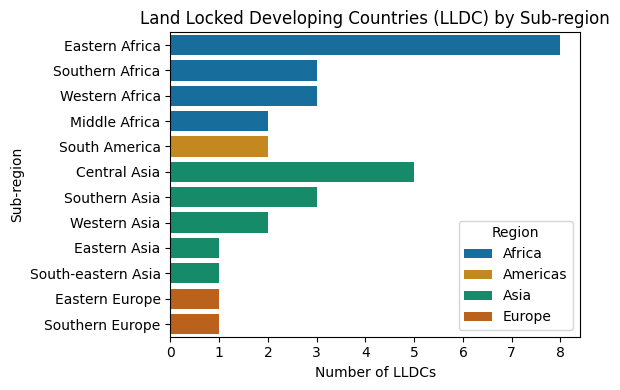

In [ ]:
# Plot
sns.set_palette("colorblind")
plt.figure(figsize=(6, 4))
sns.barplot(
    data=lldc_counts,
    x='Country Count',
    y='Sub-region Name',
    hue='Region Name',
    dodge=False
)
plt.title('Land Locked Developing Countries (LLDC) by Sub-region')
plt.xlabel('Number of LLDCs')
plt.ylabel('Sub-region')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

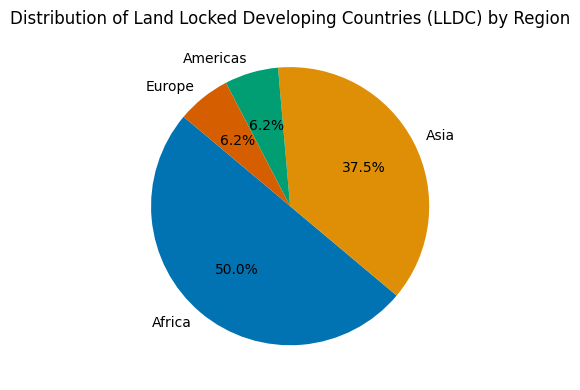

In [ ]:
# Plot pie chart
lldc_by_region = lldcs['Region Name'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    lldc_by_region.values,
    labels=lldc_by_region.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10}
)
plt.title('Distribution of Land Locked Developing Countries (LLDC) by Region')
plt.tight_layout()
plt.show()

In [ ]:
# 8. Small Island Developing States (SIDS)
sids = M49_extended[M49_extended['Small Island Developing States (SIDS)'] == 'x']
print(ldcs.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 4 to 246
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Global Code                              44 non-null     int64  
 1   Global Name                              44 non-null     object 
 2   Region Code                              44 non-null     float64
 3   Region Name                              44 non-null     object 
 4   Sub-region Code                          44 non-null     float64
 5   Sub-region Name                          44 non-null     object 
 6   Country or Area                          44 non-null     object 
 7   M49 Code                                 44 non-null     int64  
 8   ISO-alpha2 Code                          44 non-null     object 
 9   ISO-alpha3 Code                          44 non-null     object 
 10  Least Developed Countries (LDC)          44 non-null    

In [ ]:
# Count of SIDS by Region and Sub-region
sids_counts = (
    sids.groupby(['Region Name', 'Sub-region Name'])['Country or Area']
    .count()
    .reset_index(name='Country Count')
    .sort_values(by=['Region Name', 'Country Count'], ascending=[True, False])
    .reset_index(drop=True)
)
print(sids_counts)

   Region Name     Sub-region Name  Country Count
0       Africa      Eastern Africa              3
1       Africa      Western Africa              2
2       Africa       Middle Africa              1
3     Americas           Caribbean             22
4     Americas       South America              2
5     Americas     Central America              1
6         Asia  South-eastern Asia              2
7         Asia       Southern Asia              1
8      Oceania          Micronesia              7
9      Oceania           Polynesia              7
10     Oceania           Melanesia              5


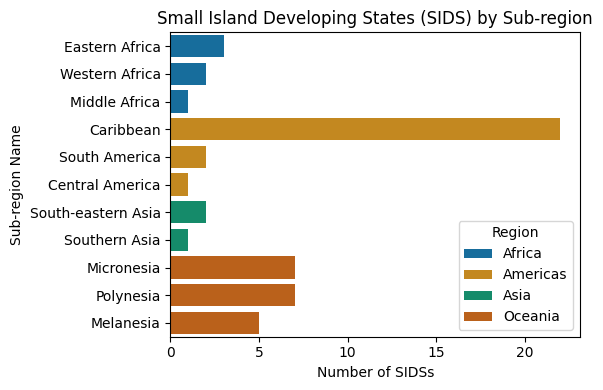

In [ ]:
# Plot
sns.set_palette("colorblind")
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sids_counts,
    x='Country Count',
    y='Sub-region Name',
    hue='Region Name',
    dodge=False
)
plt.title('Small Island Developing States (SIDS) by Sub-region')
plt.xlabel('Number of SIDSs')
plt.ylabel('Sub-region Name')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

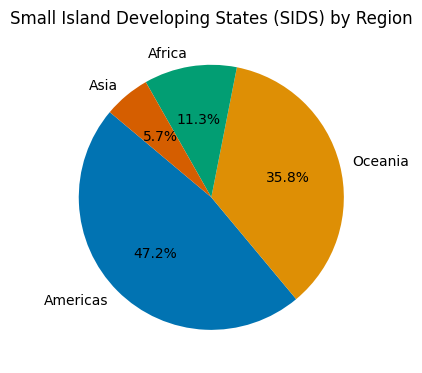

In [ ]:
# Plot pie chart
sids_by_region = sids['Region Name'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    sids_by_region.values,
    labels=sids_by_region.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10}
)
plt.title('Small Island Developing States (SIDS) by Region')
plt.tight_layout()
plt.show()

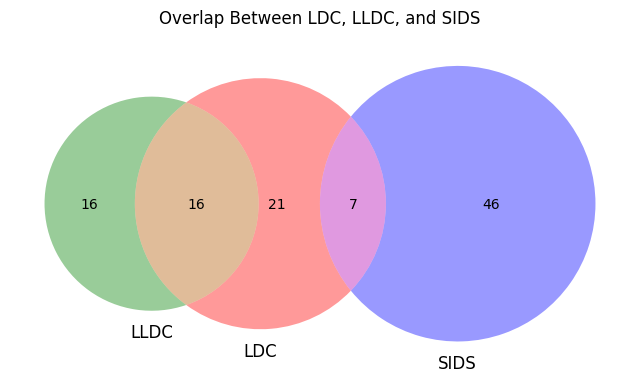

In [ ]:
from matplotlib_venn import venn3
# Step 1: Define each set from the M49 DataFrame
ldc_set = set(M49[M49['Least Developed Countries (LDC)'] == 'x']['Country or Area'])
lldc_set = set(M49[M49['Land Locked Developing Countries (LLDC)'] == 'x']['Country or Area'])
sids_set = set(M49[M49['Small Island Developing States (SIDS)'] == 'x']['Country or Area'])
# Step 2: Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn3([ldc_set, lldc_set, sids_set],
      set_labels=('LDC', 'LLDC', 'SIDS'))
plt.title("Overlap Between LDC, LLDC, and SIDS")
plt.show()